In [100]:
import eikon as eikon

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker
from functools import partial

In [102]:
 eikon.set_app_key('1153655a813e49b09943821a11d273d879402478')

In [103]:
rics = ['EDc1', 'EDc4', 'EDc7', 'EDc8', 'EDc9','EDc10','EDc11','EDc12','EDc13','EDc14', 'EDc15','EDc16']

In [104]:
#pulling all closing rates and putting into one table
table_2015_1 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2015-01-01', end_date = '2015-01-07' , interval = 'daily', calendar='native')
table_2015 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2015-01-08', end_date = '2015-12-31' , interval = 'daily', calendar='native')
table_2016_1 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2016-01-01', end_date = '2016-01-05' , interval = 'daily', calendar='native')
table_2016 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2016-01-01', end_date = '2016-12-31' , interval = 'daily', calendar='native')
table_2017_1 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2017-01-01', end_date = '2017-01-03' , interval = 'daily', calendar='native')
table_2017 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2017-01-01', end_date = '2017-12-31' , interval = 'daily', calendar='native')
table_2018_1 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2018-01-01', end_date = '2018-01-02' , interval = 'daily', calendar='native')
table_2018 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2018-01-01', end_date = '2018-12-31' , interval = 'daily', calendar='native')
table_2019 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2019-01-01', end_date = '2019-12-31' , interval = 'daily', calendar='native')

In [105]:
table = pd.concat([table_2015_1, table_2015, table_2016_1, table_2016, table_2017_1, table_2017, table_2018_1, table_2018, table_2019,], ignore_index= False)

In [106]:
table1 = table
r = pd.date_range(start = '2015-01-02', end = '2019-11-27')
table1 = table1.reindex(r)
table1.fillna(method='bfill', inplace=True)

In [107]:
#creating table3: change in rate from 1W ago 
table1['EDc1_1W'] = (table1['EDc1'] - table1['EDc1'].shift(7))*100
table1['EDc4_1W'] = (table1['EDc4'] - table1['EDc4'].shift(7))*100
table1['EDc7_1W'] = (table1['EDc7'] - table1['EDc7'].shift(7))*100
table1['EDc8_1W'] = (table1['EDc8'] - table1['EDc8'].shift(7))*100
table1['EDc9_1W'] = (table1['EDc9'] - table1['EDc9'].shift(7))*100
table1['EDc10_1W'] = (table1['EDc10'] - table1['EDc10'].shift(7))*100
table1['EDc11_1W'] = (table1['EDc11'] - table1['EDc11'].shift(7))*100
table1['EDc12_1W'] = (table1['EDc12'] - table1['EDc12'].shift(7))*100
table1['EDc13_1W'] = (table1['EDc13'] - table1['EDc13'].shift(7))*100
table1['EDc14_1W'] = (table1['EDc14'] - table1['EDc14'].shift(7))*100
table1['EDc15_1W'] = (table1['EDc15'] - table1['EDc15'].shift(7))*100
table1['EDc16_1W'] = (table1['EDc16'] - table1['EDc16'].shift(7))*100

table3 = table1.loc[:,"EDc1_1W":"EDc16_1W"]
table3 = table3[7:]
table3

CLOSE,EDc1_1W,EDc4_1W,EDc7_1W,EDc8_1W,EDc9_1W,EDc10_1W,EDc11_1W,EDc12_1W,EDc13_1W,EDc14_1W,EDc15_1W,EDc16_1W
2015-01-09,0.00,2.5,9.5,12.0,14.0,16.0,18.5,20.5,21.5,22.5,23.5,23.5
2015-01-10,0.00,2.0,11.0,14.5,17.5,20.5,23.0,24.5,24.5,24.5,24.5,23.5
2015-01-11,0.00,2.0,11.0,14.5,17.5,20.5,23.0,24.5,24.5,24.5,24.5,23.5
2015-01-12,0.00,2.0,11.0,14.5,17.5,20.5,23.0,24.5,24.5,24.5,24.5,23.5
2015-01-13,-0.25,2.0,10.0,13.5,16.5,18.5,20.0,20.5,20.0,19.0,18.0,16.5
2015-01-14,0.00,3.0,12.0,16.5,20.5,23.5,25.0,26.0,26.5,25.5,24.0,22.5
2015-01-15,0.00,4.0,14.0,20.0,25.5,29.5,32.5,34.5,36.0,37.0,37.0,36.5
2015-01-16,-0.25,1.5,7.0,10.5,14.0,17.0,19.0,20.5,22.0,22.5,22.0,22.0
2015-01-17,-0.75,-2.5,4.5,6.5,8.5,9.5,10.0,10.5,11.5,12.0,12.0,12.5
2015-01-18,-0.75,-2.5,4.5,6.5,8.5,9.5,10.0,10.5,11.5,12.0,12.0,12.5


In [108]:
#returning table1: raw data with filled in dates
table1 =table1.loc[:,"EDc1":"EDc16"]

In [109]:
white = ['EDc1_1W', 'EDc4_1W', 'EDc7_1W', 'EDc8_1W']

ED_white = []
for x in white:
    ED_white.extend(table3[x])
    
EDw = pd.DataFrame(ED_white)

In [110]:
red = ['EDc9_1W', 'EDc10_1W', 'EDc11_1W', 'EDc12_1W']

ED_red = []
for x in red:
    ED_red.extend(table3[x])
    
EDr = pd.DataFrame(ED_red)

In [111]:
green = ['EDc13_1W', 'EDc14_1W', 'EDc15_1W', 'EDc16_1W']

ED_green = []
for x in green:
    ED_green.extend(table3[x])

EDg = pd.DataFrame(ED_green)

In [112]:
%matplotlib notebook

<IPython.core.display.Javascript object>


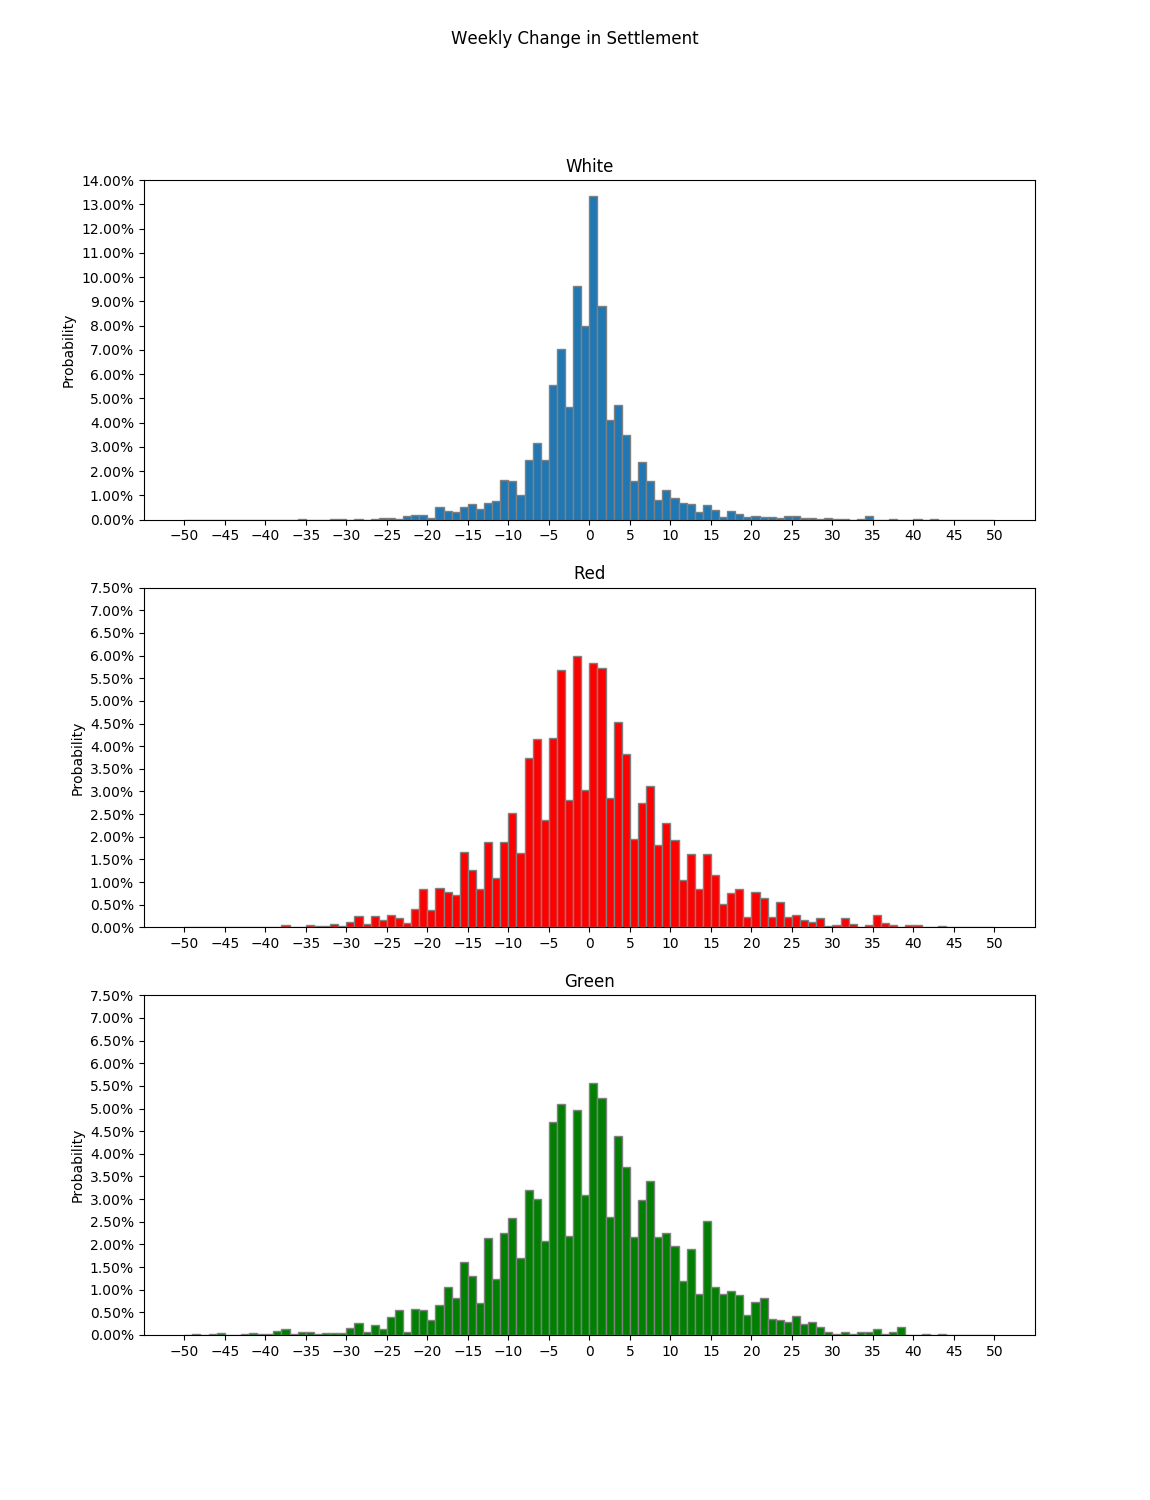

In [113]:
fig1, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(11.5,15))

ax1.hist(EDw , bins = 100, range=[-50,50], normed = True, edgecolor='grey' )
ax2.hist(EDr , bins = 100, range=[-50,50], normed = True, edgecolor='grey', color = 'red')
ax3.hist(EDg , bins = 100, range=[-50,50], normed = True, edgecolor='grey', color = 'green')

ax1.title.set_text('White')
ax2.title.set_text('Red')
ax3.title.set_text('Green')

ax1.set_xticks(np.arange(-50,51,5))
ax2.set_xticks(np.arange(-50,51,5))
ax3.set_xticks(np.arange(-50,51,5))

ax1.set_ylabel('Probability')
ax2.set_ylabel('Probability')
ax3.set_ylabel('Probability')

ax1.set_yticks(np.arange(0,0.15,0.010))
ax2.set_yticks(np.arange(0,0.08,0.005))
ax3.set_yticks(np.arange(0,0.08,0.005))

y_vals1 = ax1.get_yticks()
ax1.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals1])
y_vals2 = ax2.get_yticks()
ax2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals2])
y_vals3 = ax3.get_yticks()
ax3.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals3])

fig1.suptitle('Weekly Change in Settlement')

In [114]:
EDw_filtered1 = EDw[0] >= 10 
EDw_filtered1 = np.where(EDw_filtered1)[0] + 7
EDw_nextday1 = EDw.loc[EDw_filtered1]

In [115]:
EDw_filtered2 = EDw[0] < -10 
EDw_filtered2 = np.where(EDw_filtered2)[0] + 7
EDw_nextday2 = EDw.loc[EDw_filtered2]

<IPython.core.display.Javascript object>


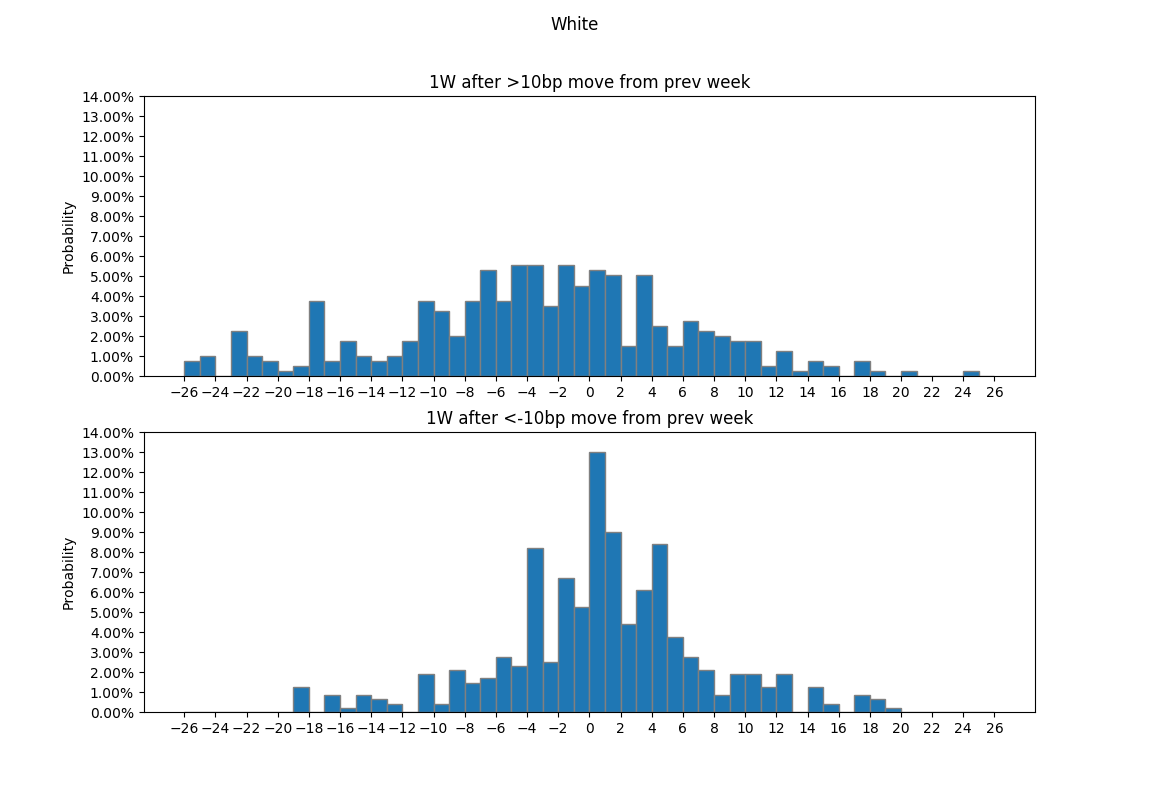

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


In [116]:
fig2, (ax4,ax5) = plt.subplots(2,1, figsize=(11.5,8))

ax4.hist(EDw_nextday1, bins = 52, range=[-26,26], normed = True, edgecolor='grey')
ax5.hist(EDw_nextday2, bins = 52, range=[-26,26], normed = True, edgecolor='grey')

ax4.title.set_text('1W after >10bp move from prev week')
ax5.title.set_text('1W after <-10bp move from prev week')

ax4.set_xticks(np.arange(-26,27,2))
ax5.set_xticks(np.arange(-26,27,2))

ax4.set_ylabel('Probability')
ax5.set_ylabel('Probability')

ax4.set_yticks(np.arange(0,0.15,0.01))
ax5.set_yticks(np.arange(0,0.15,0.01))

y_vals4 = ax4.get_yticks()
ax4.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals4])
y_vals5 = ax5.get_yticks()
ax5.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals5])

fig2.suptitle('White')

In [43]:
EDr_filtered1 = EDr[0] >= 10 
EDr_filtered1 = np.where(EDr_filtered1)[0] + 7
EDr_nextday1 = EDr.loc[EDr_filtered1]

In [44]:
EDr_filtered2 = EDr[0] < -10 
EDr_filtered2 = np.where(EDr_filtered2)[0] + 7
EDr_nextday2 = EDr.loc[EDr_filtered2]

<IPython.core.display.Javascript object>


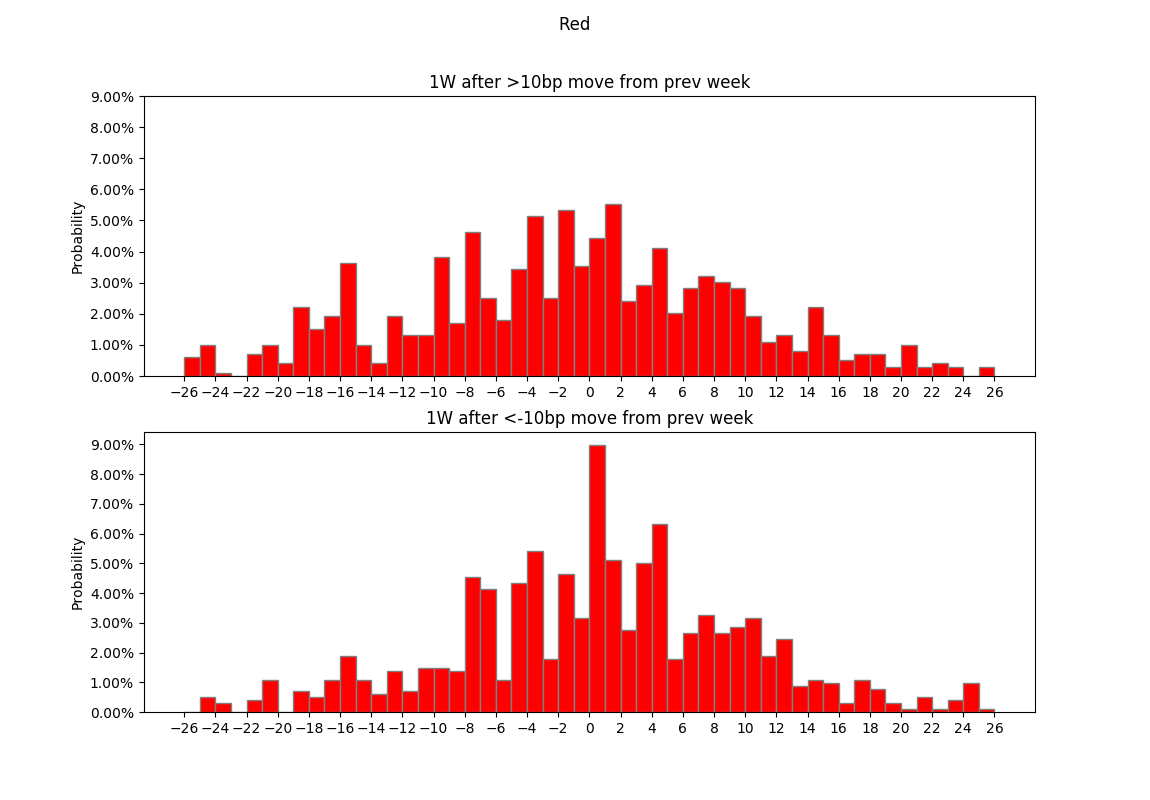

In [45]:
fig3, (ax6,ax7) = plt.subplots(2,1, figsize=(11.5,8))

ax6.hist(EDr_nextday1, bins = 52, range=[-26,26], normed = True, edgecolor='grey', color = 'red')
ax7.hist(EDr_nextday2, bins = 52, range=[-26,26], normed = True, edgecolor='grey', color = 'red')

ax6.title.set_text('1W after >10bp move from prev week')
ax7.title.set_text('1W after <-10bp move from prev week')

ax6.set_xticks(np.arange(-26,27,2))
ax7.set_xticks(np.arange(-26,27,2))

ax6.set_ylabel('Probability')
ax7.set_ylabel('Probability')

ax6.set_yticks(np.arange(0,0.10,0.01))
ax7.set_yticks(np.arange(0,0.10,0.01))

y_vals6 = ax6.get_yticks()
ax6.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals6])
y_vals7 = ax7.get_yticks()
ax7.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals7])

fig3.suptitle('Red')

In [46]:
EDg_filtered1 = EDg[0] >= 10 
EDg_filtered1 = np.where(EDg_filtered1)[0] + 7
EDg_nextday1 = EDg.loc[EDg_filtered1]

In [47]:
EDg_filtered2 = EDg[0] < -10 
EDg_filtered2 = np.where(EDg_filtered2)[0] + 7
EDg_nextday2 = EDg.loc[EDg_filtered2]

<IPython.core.display.Javascript object>


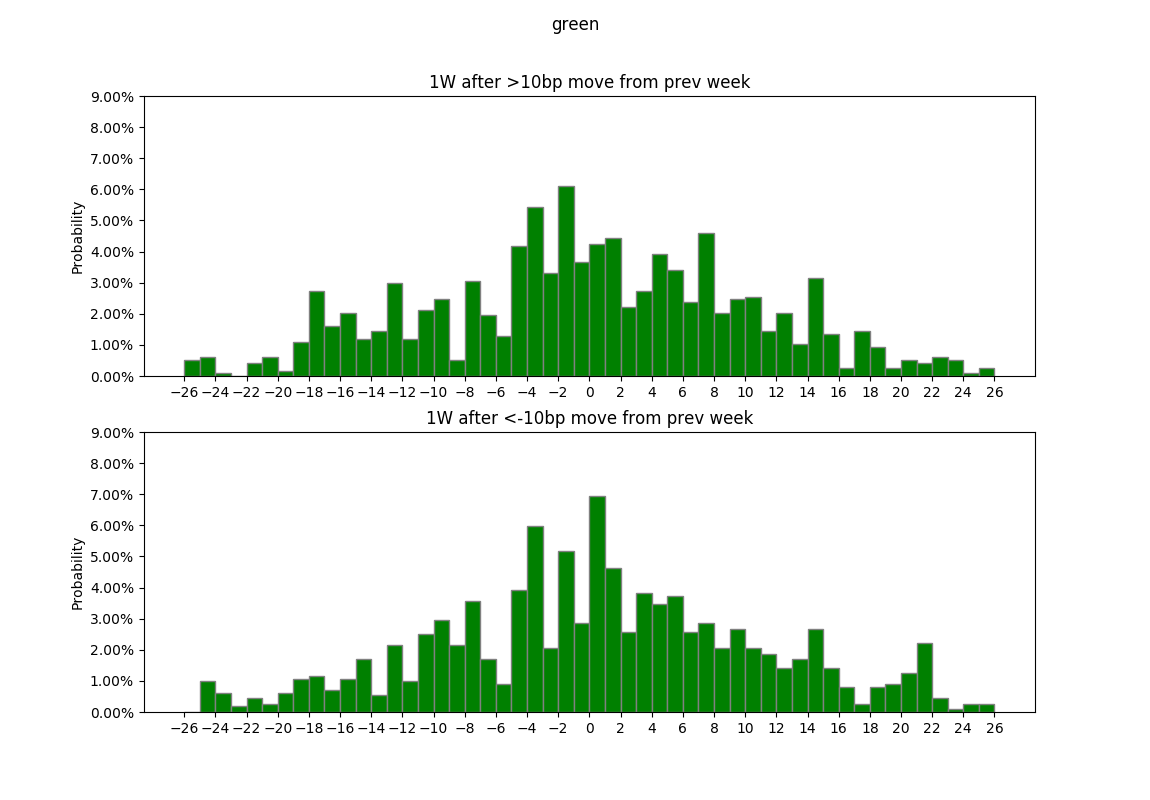

In [48]:
fig4, (ax8,ax9) = plt.subplots(2,1, figsize=(11.5,8))

ax8.hist(EDg_nextday1, bins = 52, range=[-26,26], normed = True, edgecolor='grey', color = 'green')
ax9.hist(EDg_nextday2, bins = 52, range=[-26,26], normed = True, edgecolor='grey', color = 'green')

ax8.title.set_text('1W after >10bp move from prev week')
ax9.title.set_text('1W after <-10bp move from prev week')

ax8.set_xticks(np.arange(-26,27,2))
ax9.set_xticks(np.arange(-26,27,2))

ax8.set_ylabel('Probability')
ax9.set_ylabel('Probability')

ax8.set_yticks(np.arange(0,0.10,0.01))
ax9.set_yticks(np.arange(0,0.10,0.01))

y_vals8 = ax8.get_yticks()
ax8.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals8])
y_vals9 = ax9.get_yticks()
ax9.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals9])

fig4.suptitle('green')

In [49]:
def count(list1,l,r):
    return len(list(x for x in list1 if l < x <= r))

In [86]:
count(EDg_nextday2[0], -2, 2)/len(EDg_nextday2)

0.19520851818988466

In [95]:
sum(EDw_nextday2[0])

nan